In [1]:
import os
import sys
import pathlib

import numpy as np
import pandas as pd

In [4]:
CURRENT_DIR = pathlib.Path(os.getcwd()).parent
DATA_DIR = CURRENT_DIR / "data"
RANDOM_SEED = 42

In [5]:
sys.path.append(str(CURRENT_DIR))

from time_series_masters.data_analysis.clustering import cluster_ts, plot_clustered_series, find_optimal_n_clusters
from time_series_masters.data_analysis.utils import describe_ts, resample_ts, draw_resampled, calculate_slope

c:\Users\User\.conda\envs\tsururu\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


__В этом ноутбуке рассмотрен датасет: ETT.__

Мы смотрели на то, как ведет себя ряд при ресемплировании к другим гранулярностям, а также пытались выявить наличие тренда, смены режима и других аномалий при помощи подсчета [коэффициента наклона в линейной регрессии](https://www.vortexa.com/insights/technology/detecting-trends-in-time-series-data-using-python/#:~:text=To%20detect%20an%20increasing%20trend,series%20has%20an%20increasing%20trend.).

## ETT

Contains the 7 indicators of an electricity transformer in two years, including oil temperature, useful load, etc.

In [6]:
ett = pd.read_csv(DATA_DIR / "ettm1.csv", parse_dates=["date"])
ett.head()

,date,id,value
0,2016-07-01 00:00:00,0,5.827
1,2016-07-01 00:15:00,0,5.760
2,2016-07-01 00:30:00,0,5.760
3,2016-07-01 00:45:00,0,5.760
4,2016-07-01 01:00:00,0,5.693


In [7]:
describe_ts(ett)

Число рядов: 7
Наблюдений в ряде: [69680]
Частота ряда: unknown
Минимальная дата в ряде: 2016-07-01 00:00:00
Максимальная дата в ряде: 2018-06-26 19:45:00, 

count    487760.000000
mean          4.593655
std           6.534157
min         -26.367001
25%           1.036000
50%           2.924000
75%           7.320000
max          46.007000
Name: value, dtype: float64


Рядов немного и кластеризация для анализа не нужна. 

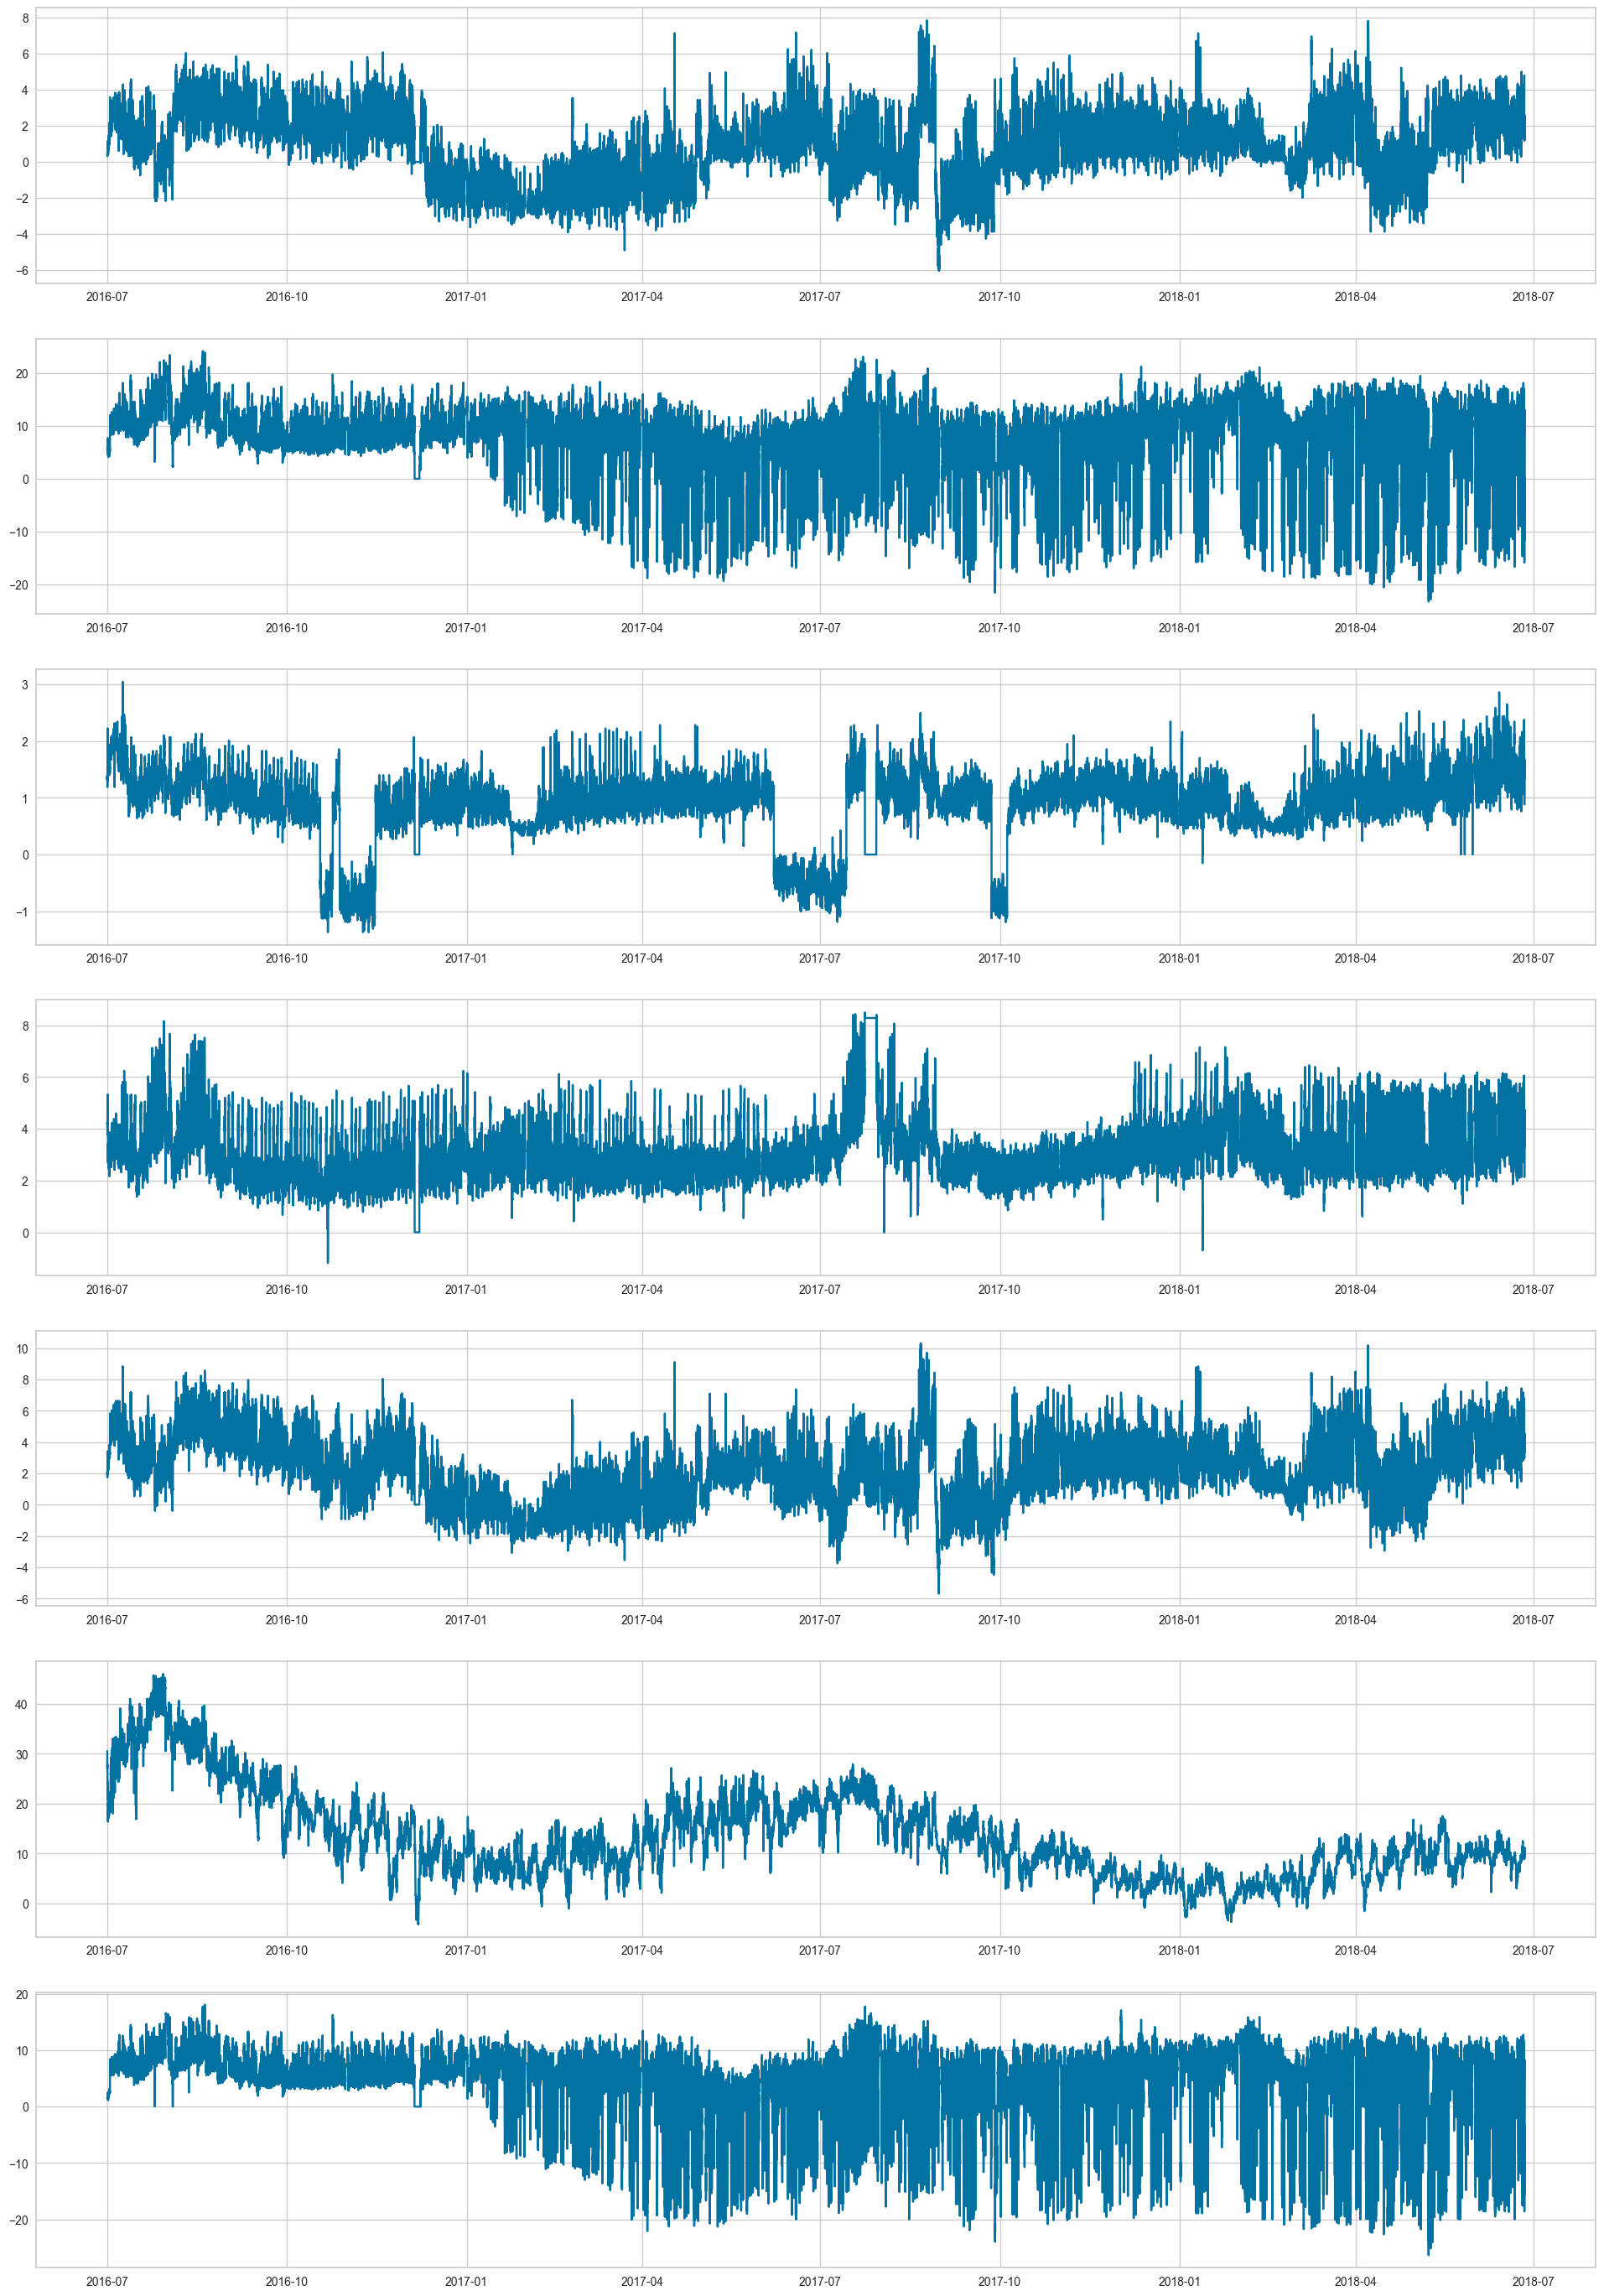

In [8]:
draw_resampled(ett, '15min', 7)

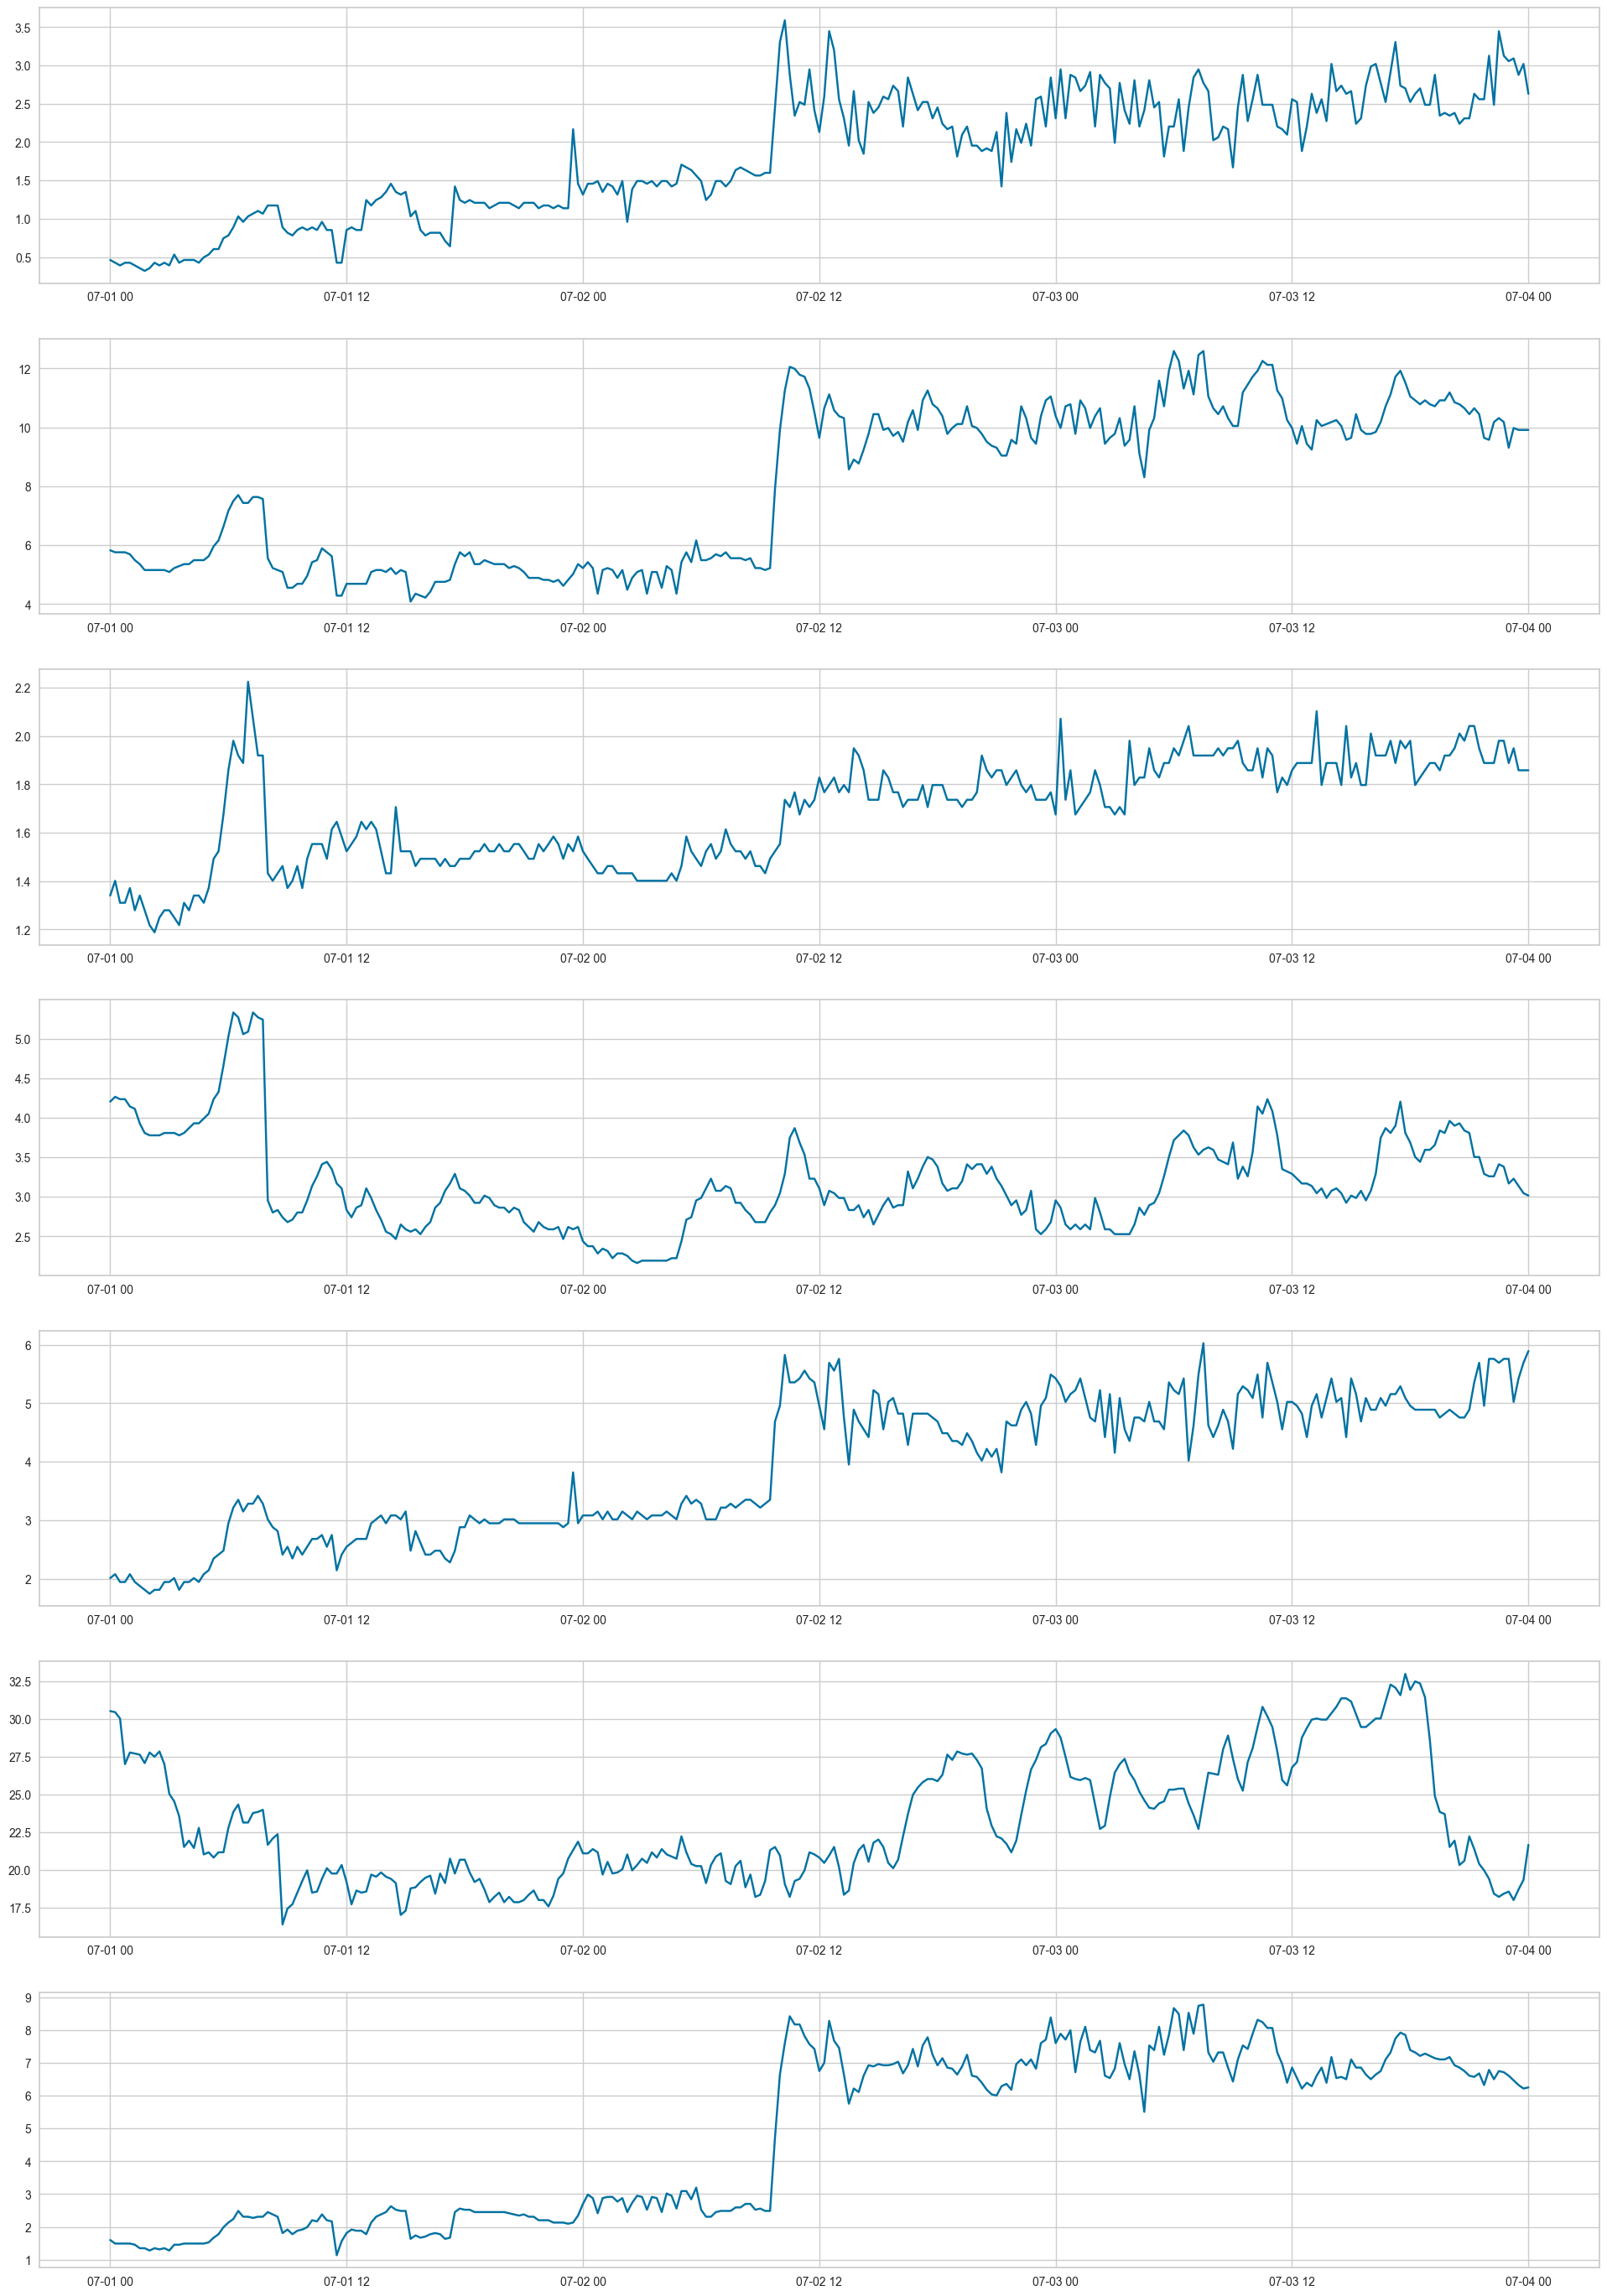

In [22]:
# Динамика внутри дня
draw_resampled(ett[(ett["date"] >= "2016-07-01") & (ett["date"] <= "2016-07-04")], '15min', 7)

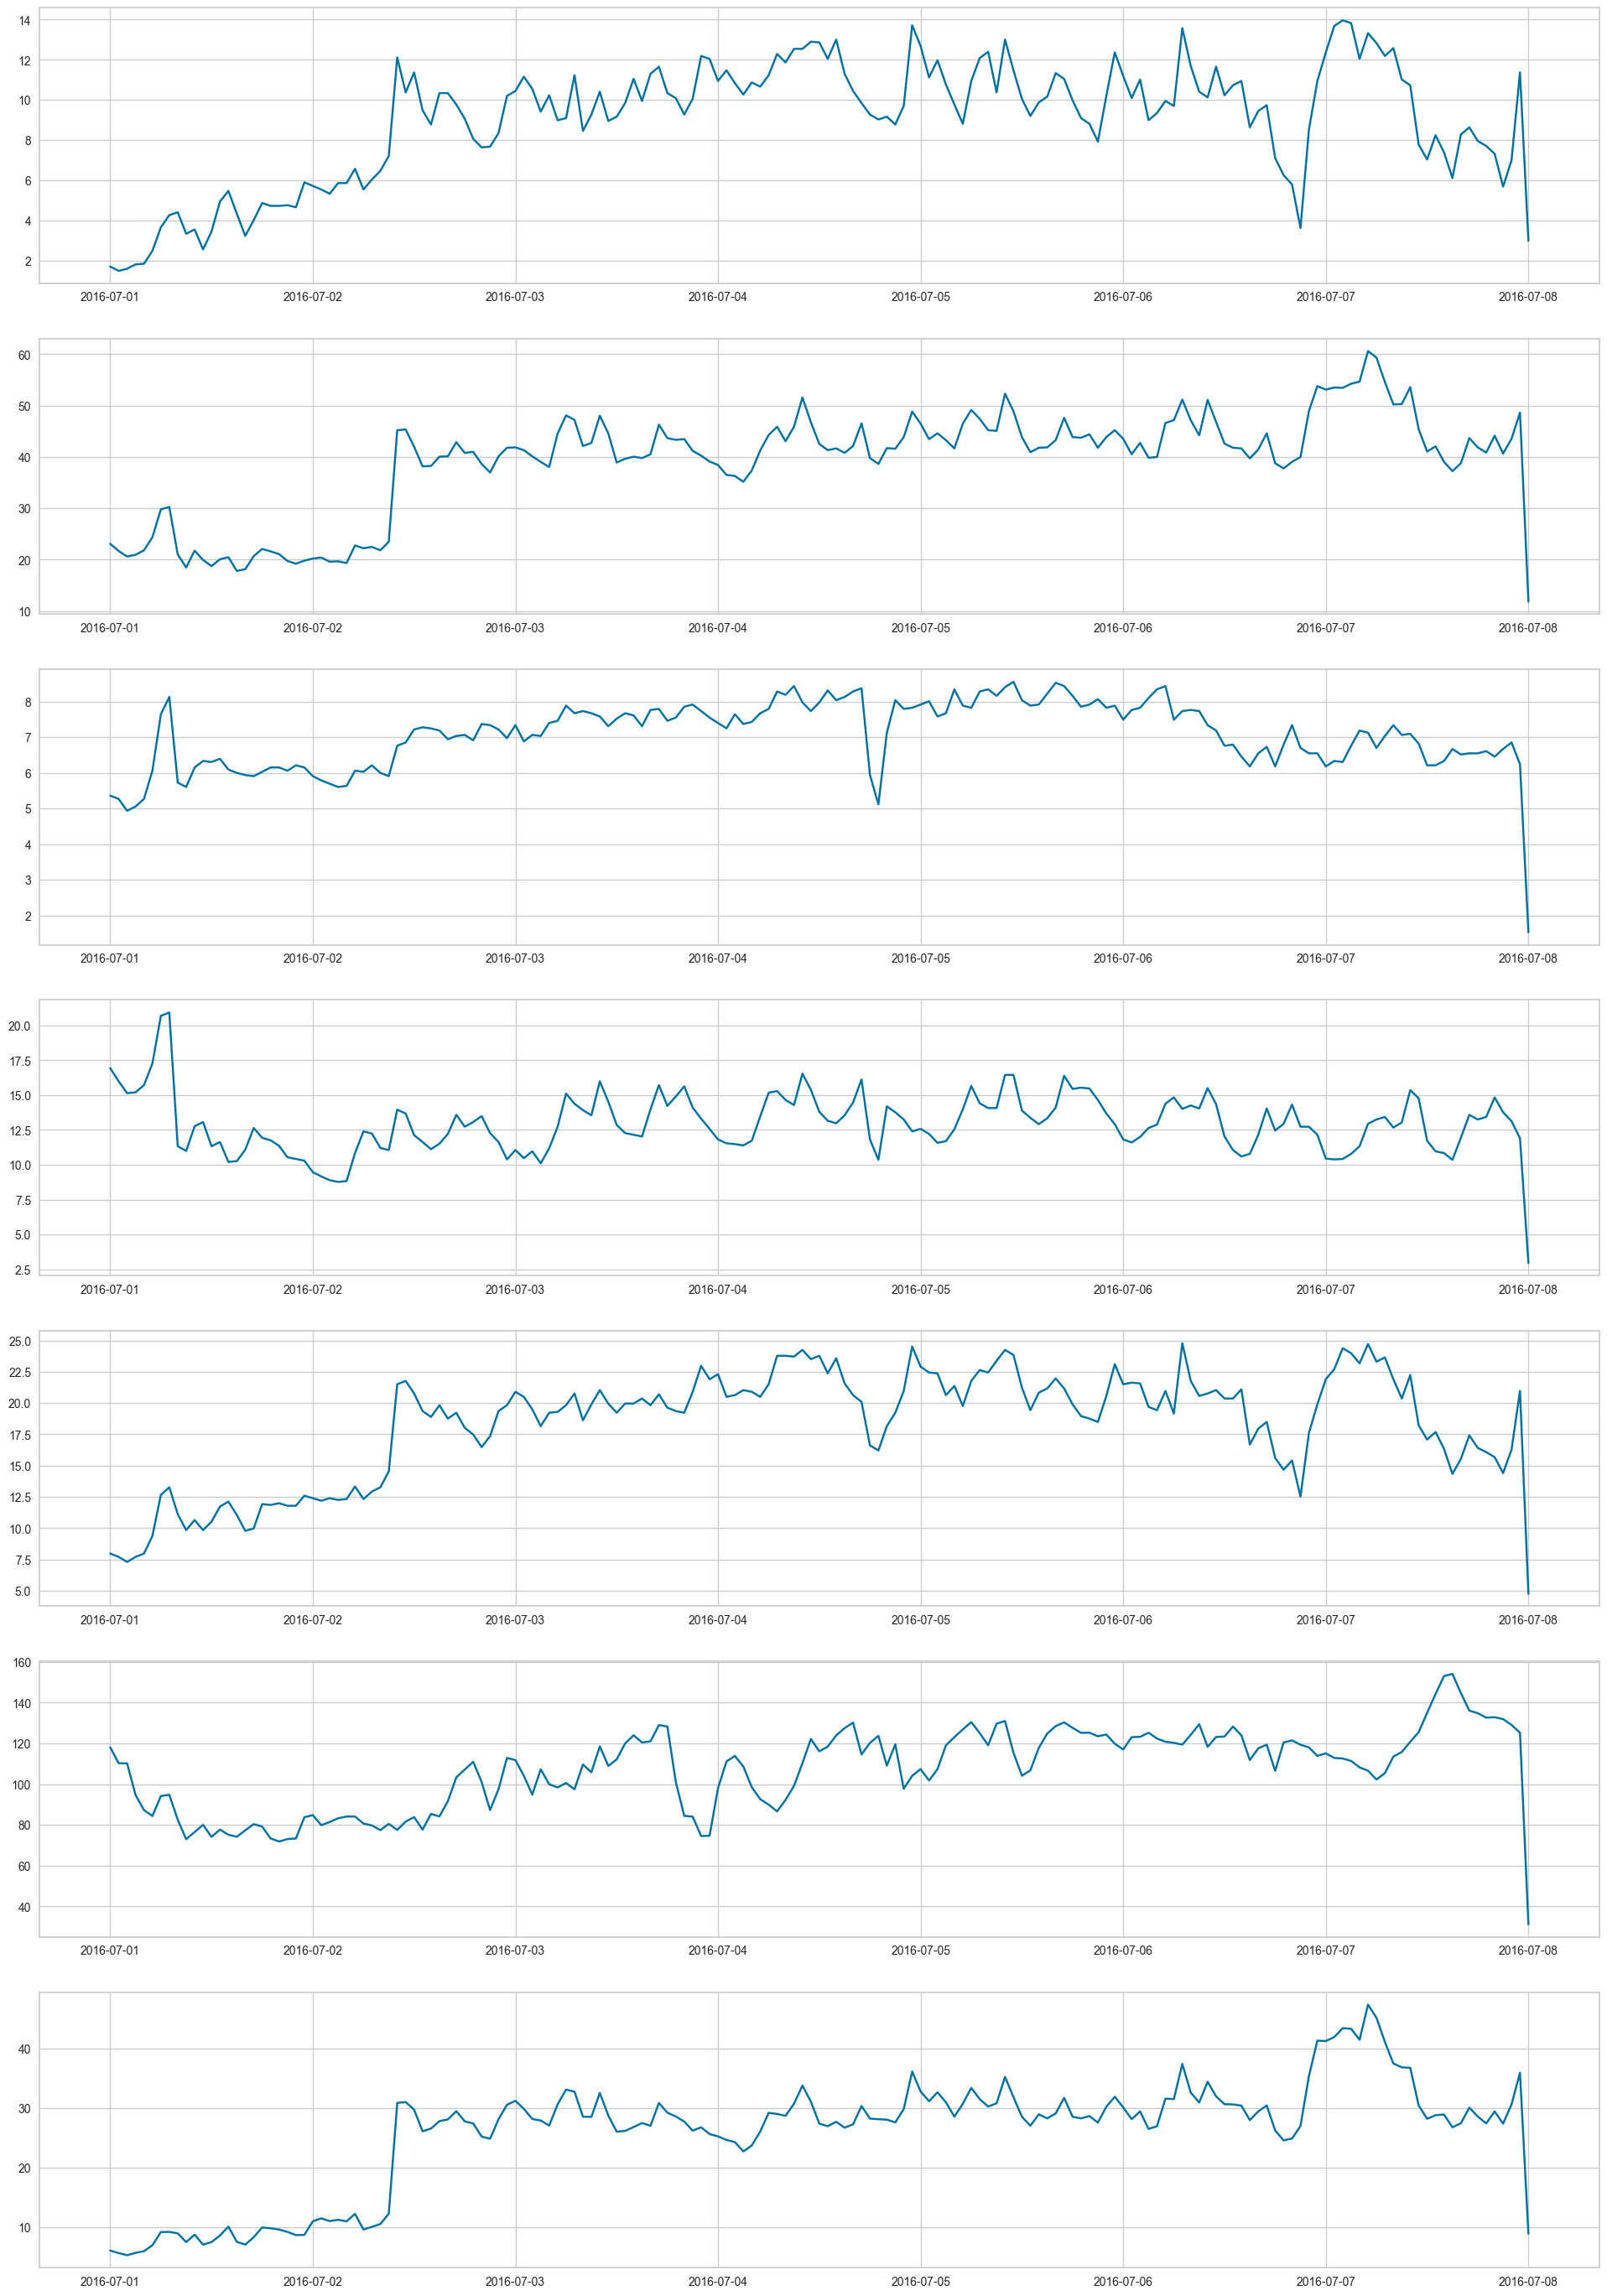

In [23]:
# Динамика внутри недели
draw_resampled(ett[(ett["date"] >= "2016-07-01") & (ett["date"] <= "2016-07-08")], 'H', 7)

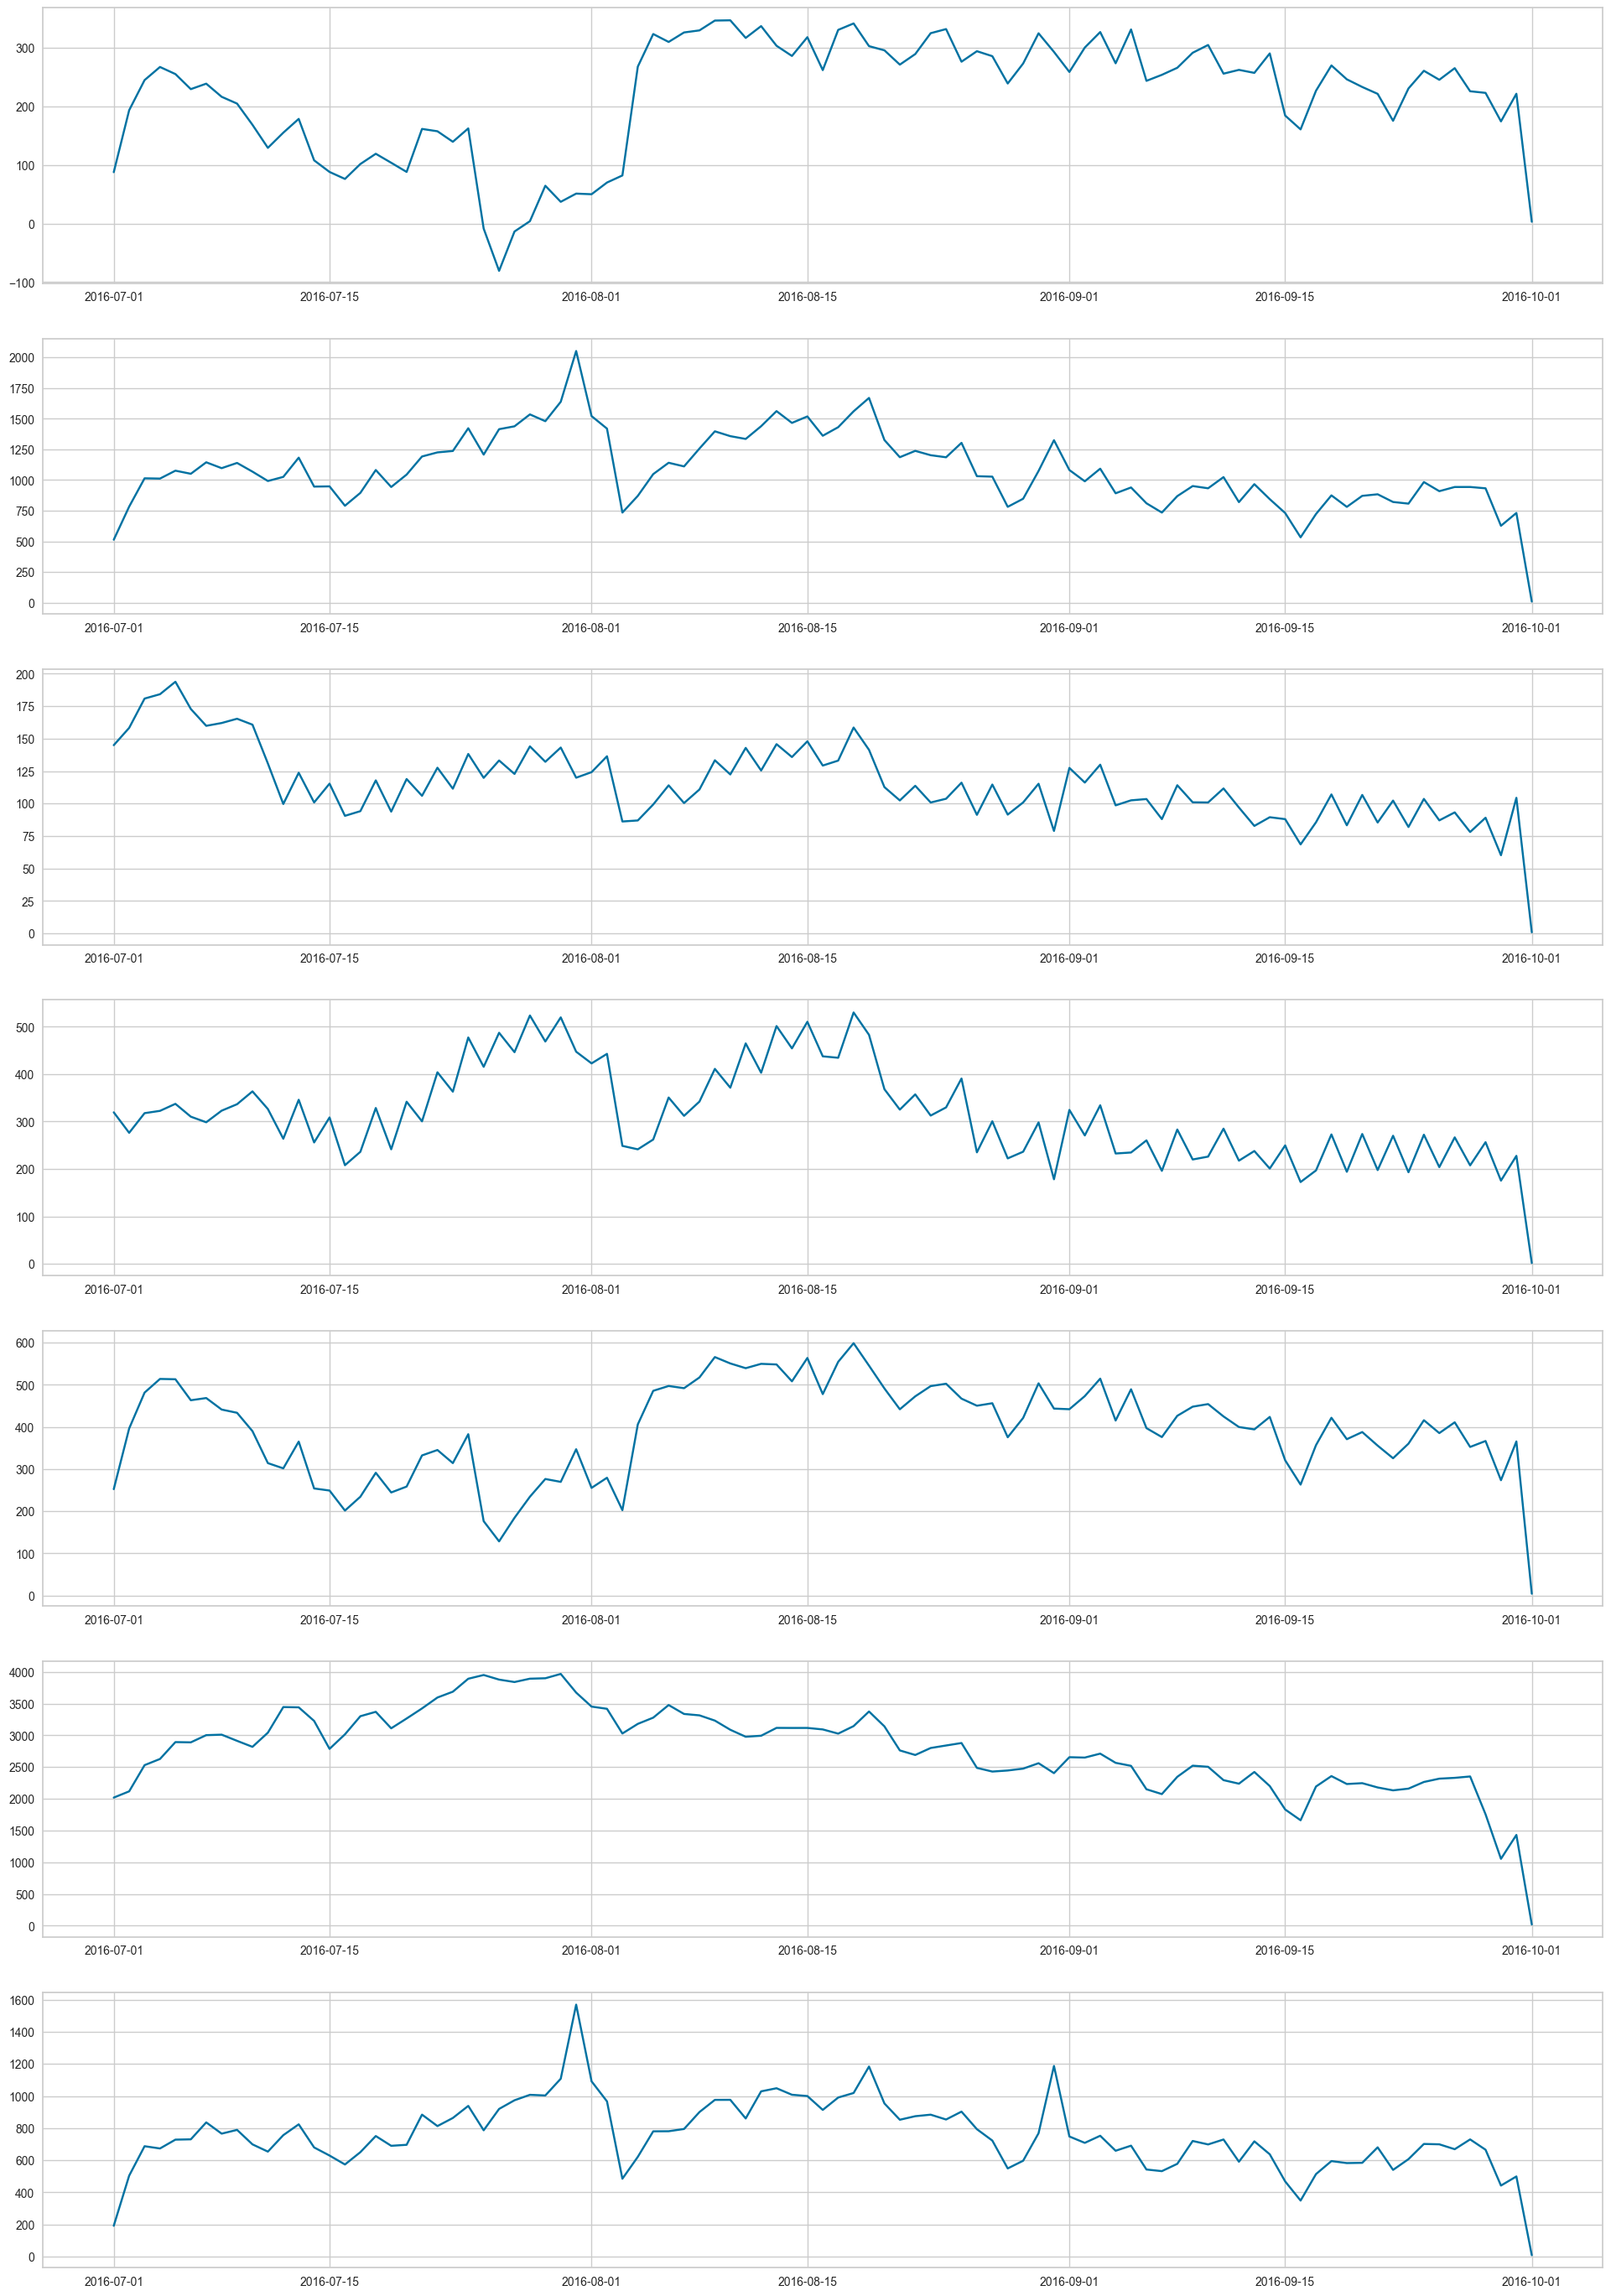

In [26]:
# Динамика внутри месяца
draw_resampled(ett[(ett["date"] >= "2016-07-01") & (ett["date"] <= "2016-10-01")], 'D', 7)

В некоторых рядах видны скачки с периодом 2 дня.

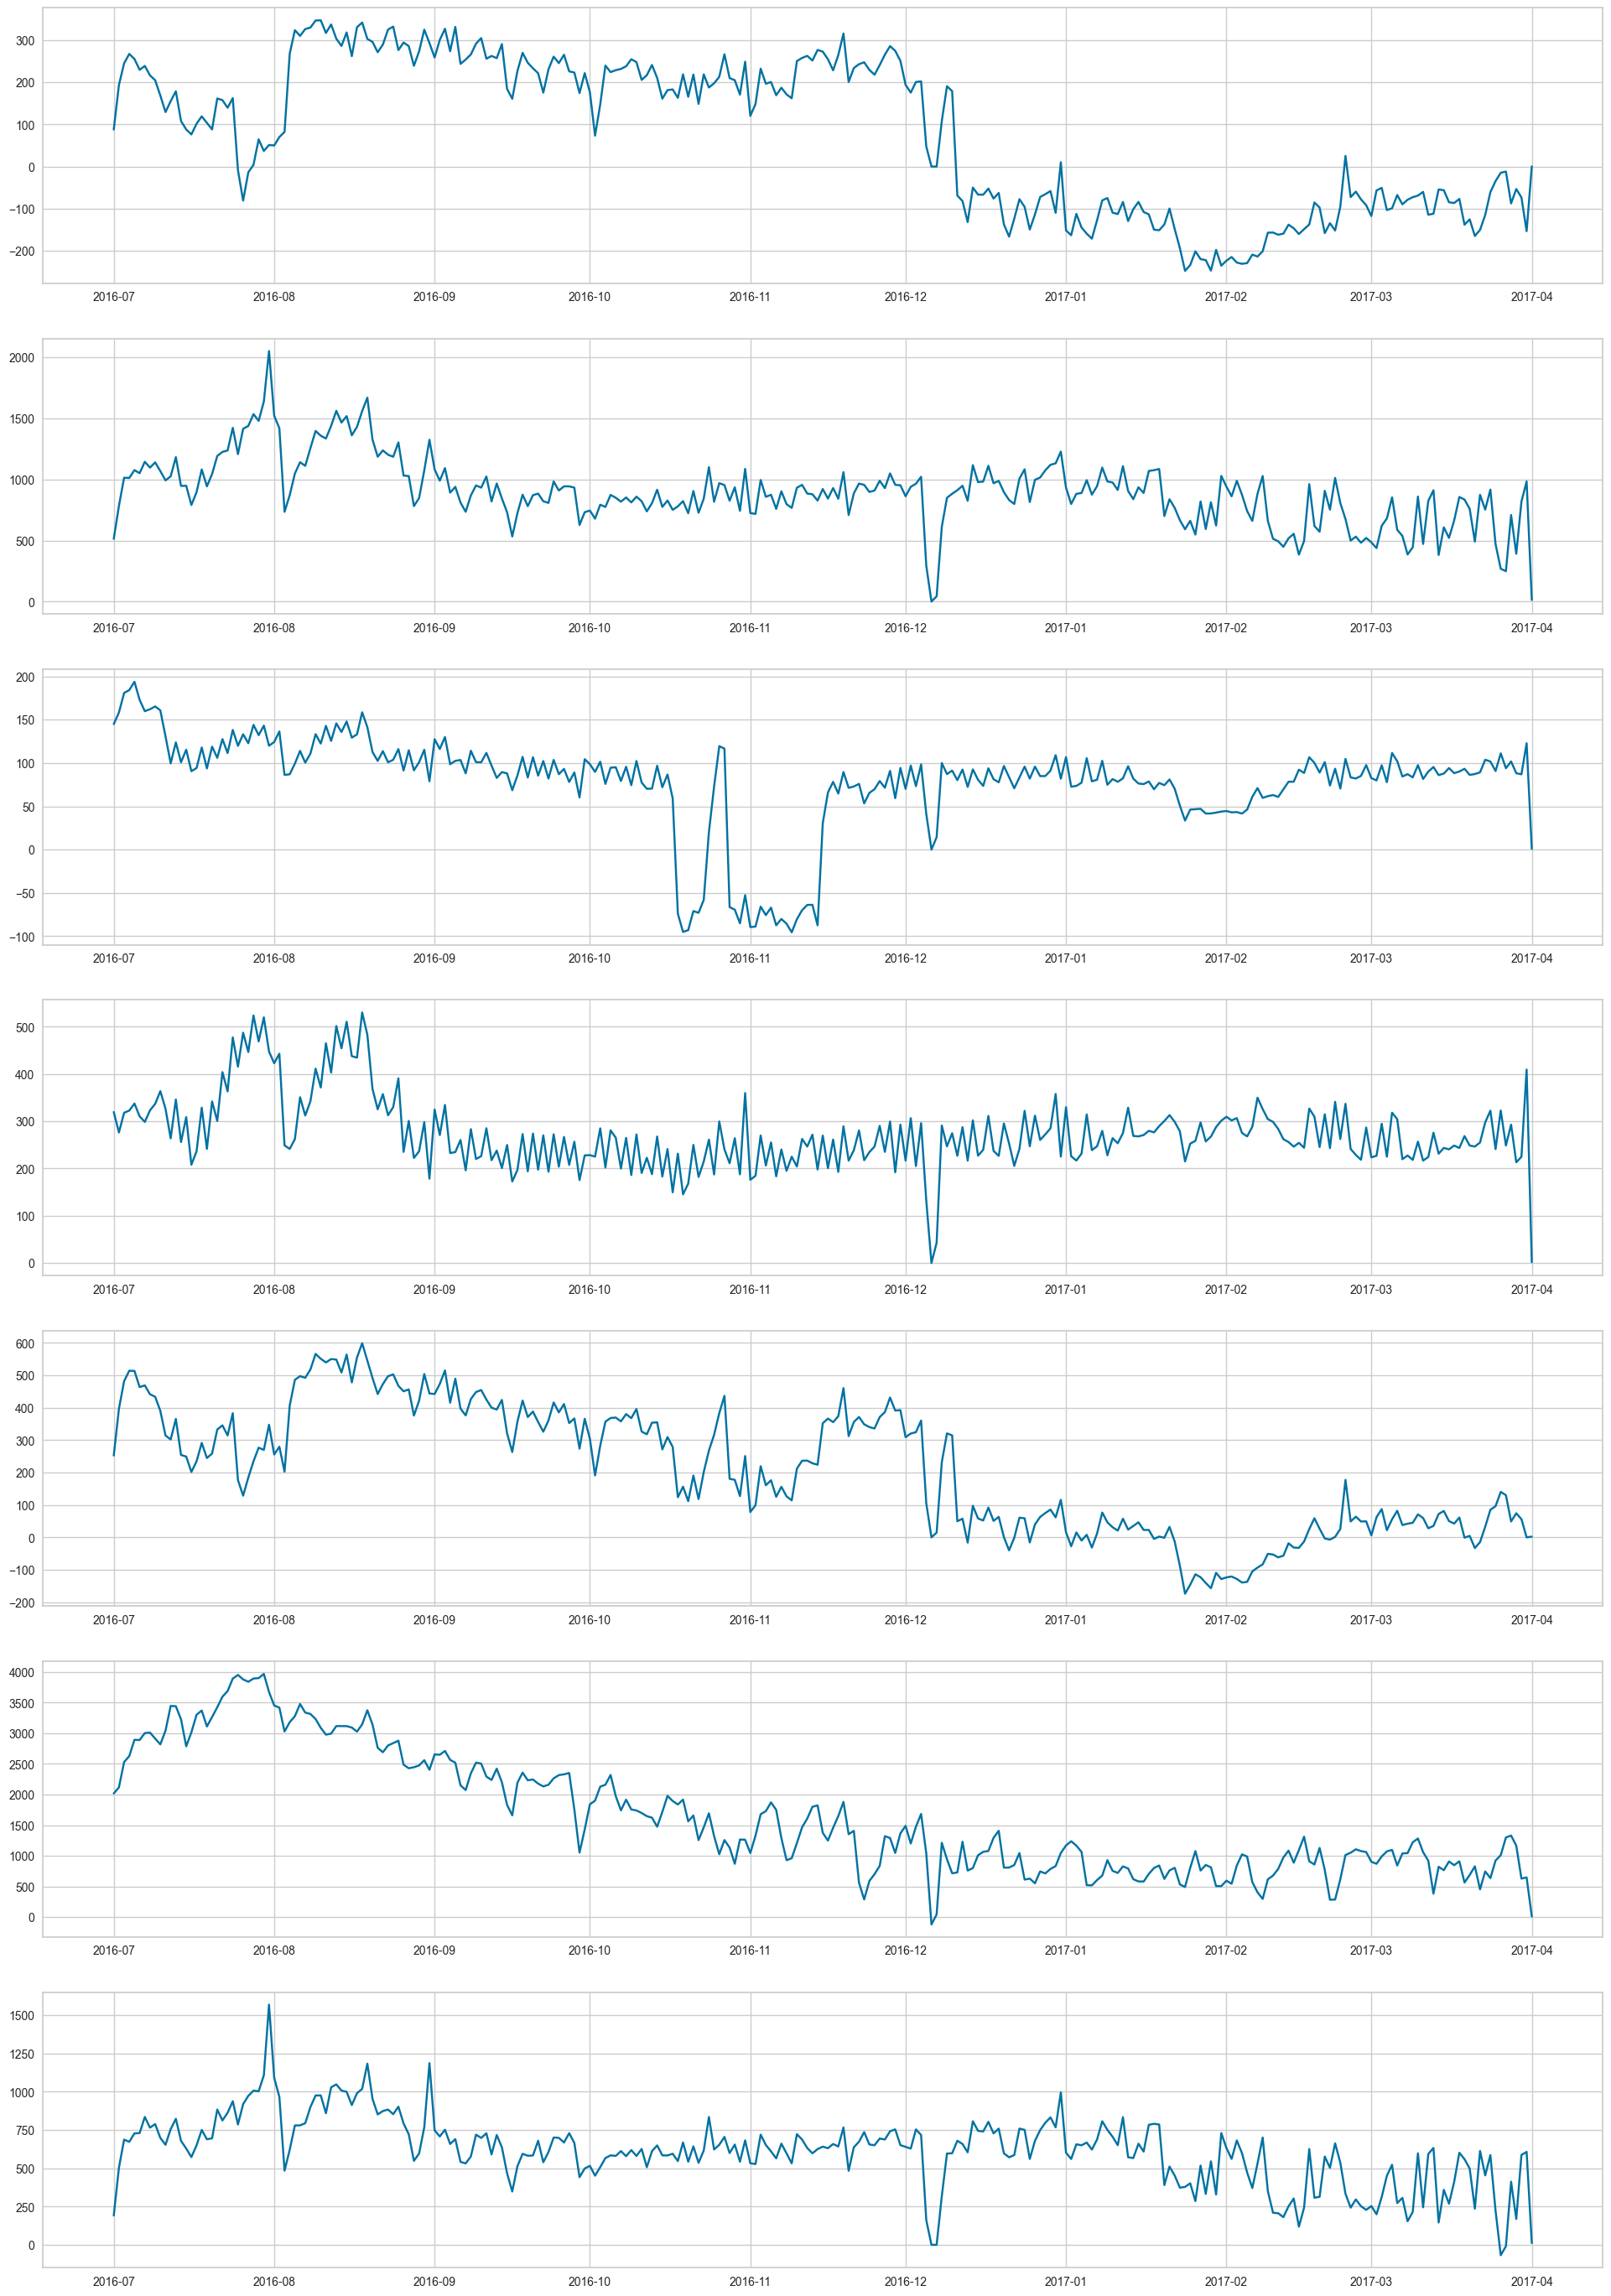

In [27]:
draw_resampled(ett[(ett["date"] >= "2016-07") & (ett["date"] <= "2017-04")], 'D', 7)

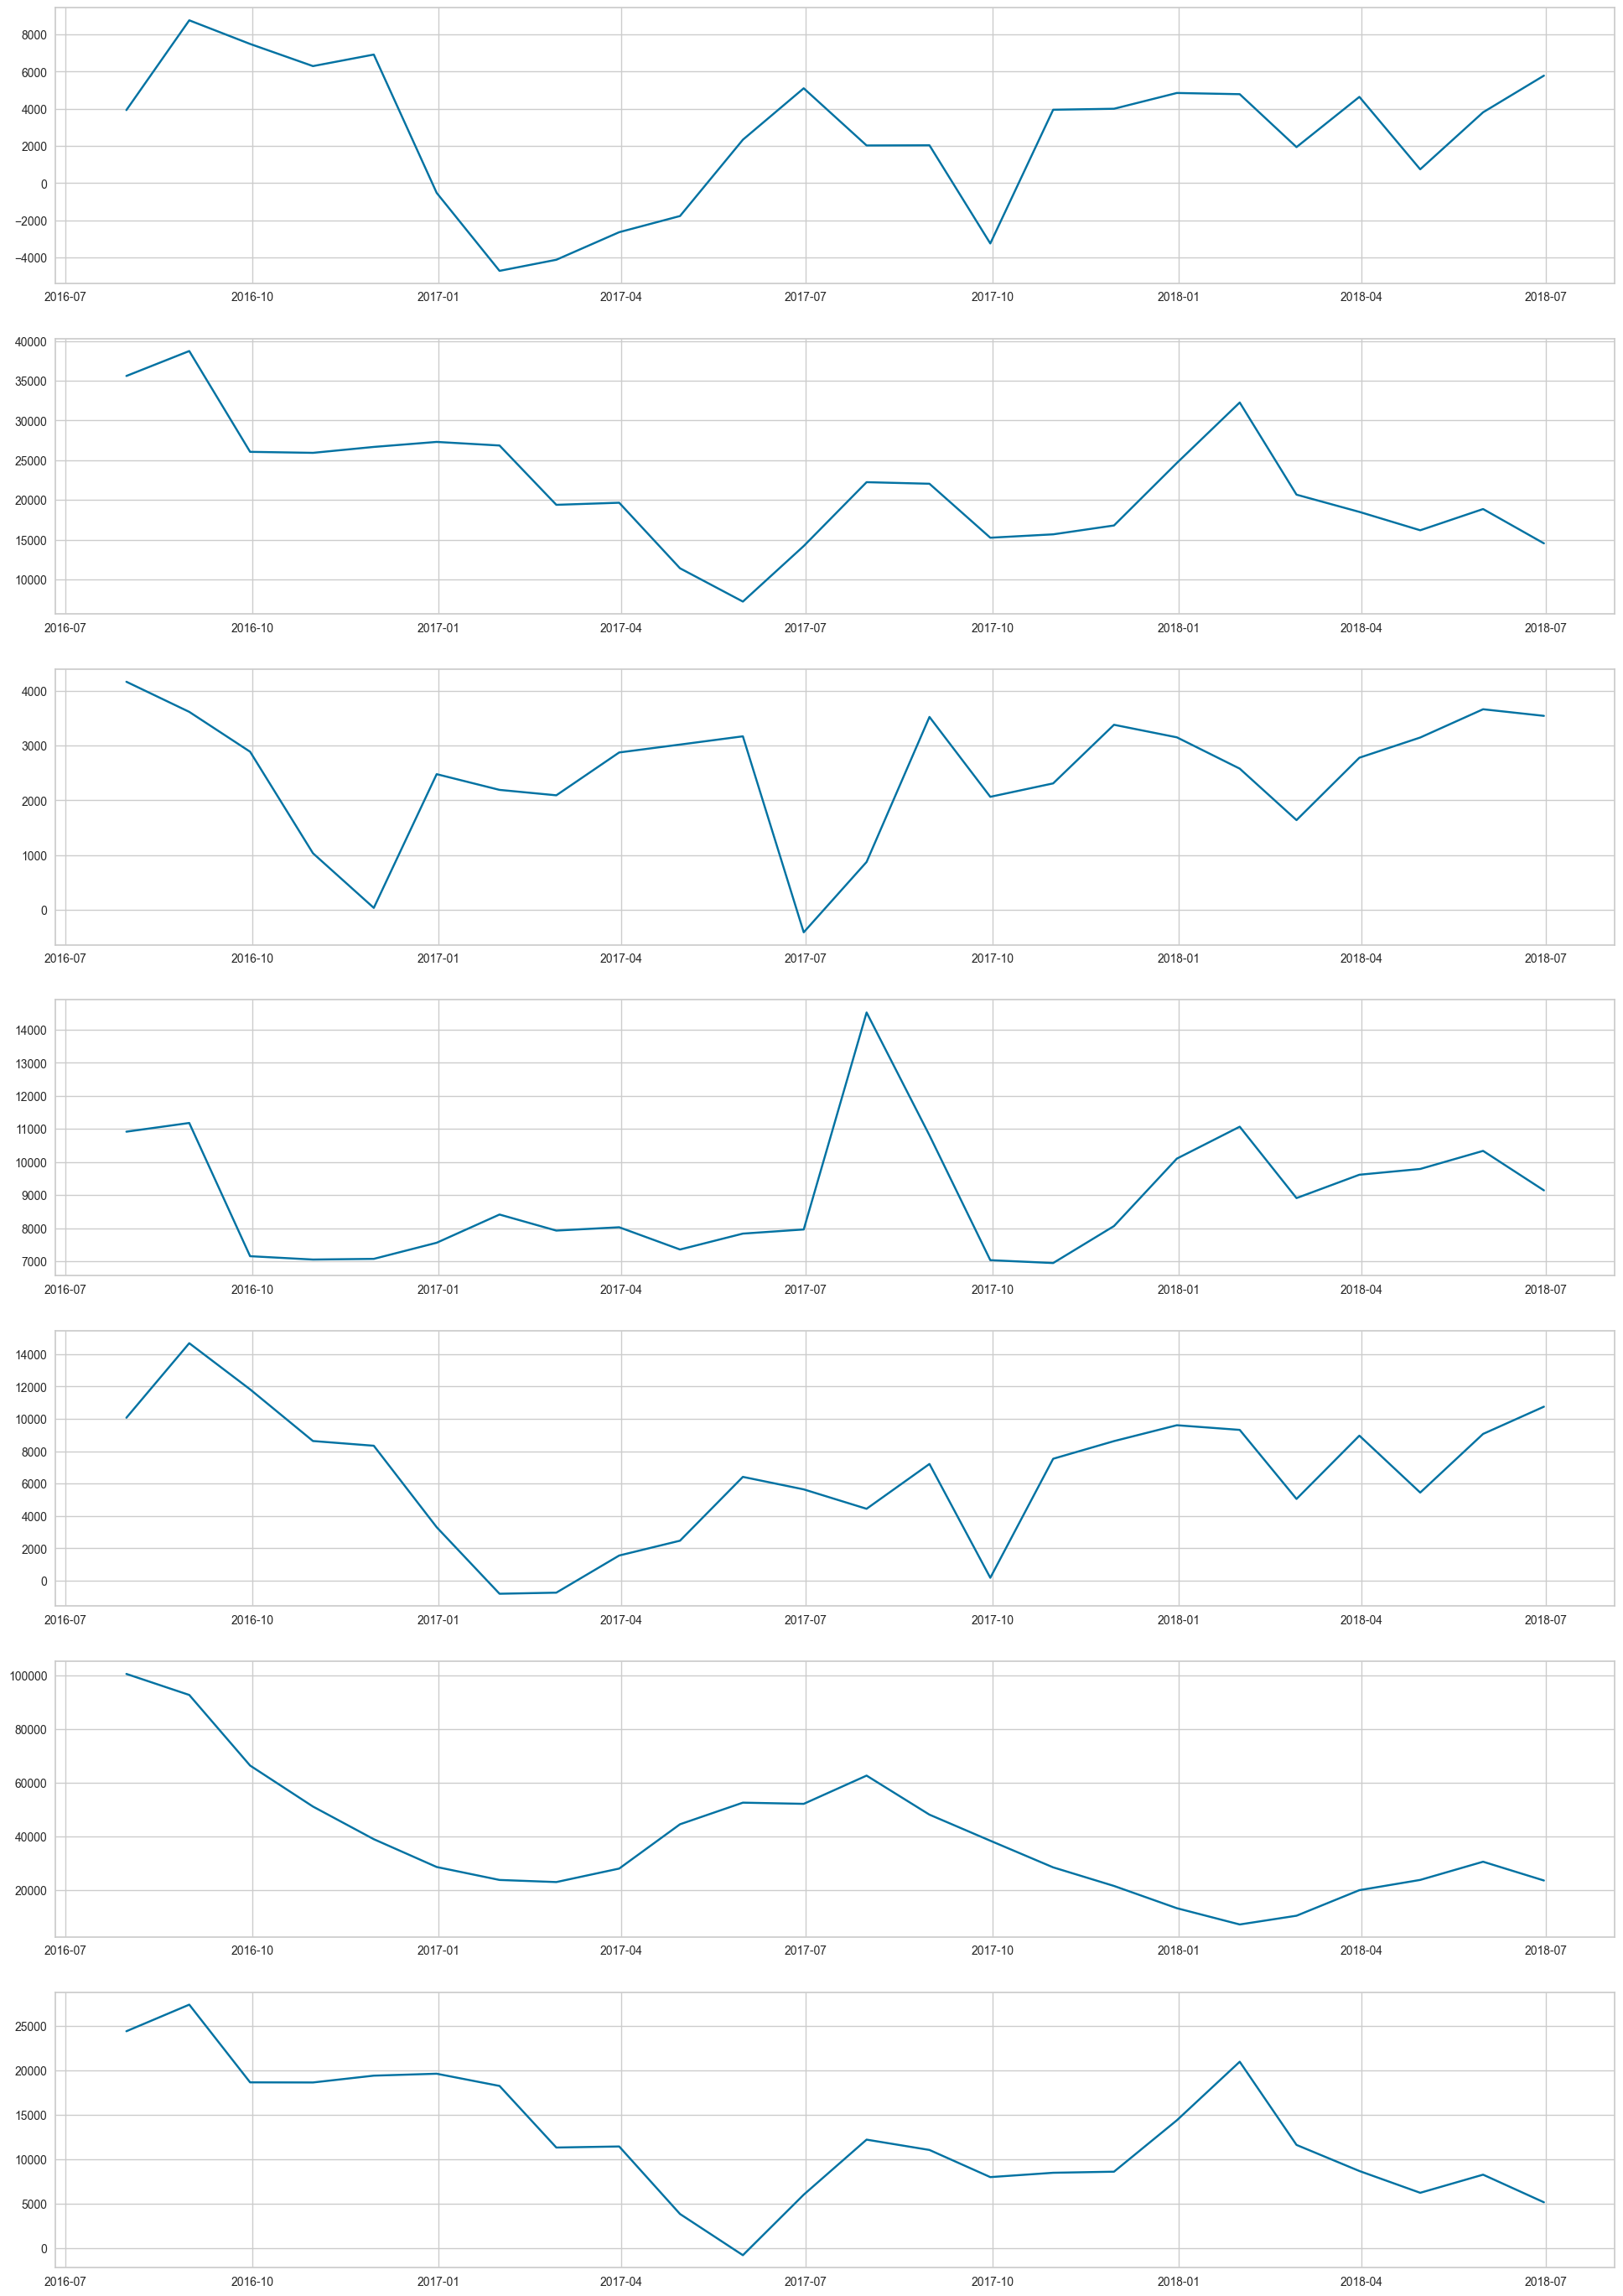

In [30]:
draw_resampled(ett, 'M', 7)

In [32]:
# Perform Linear Regression and calculate the gradient/slope
lr_df = calculate_slope(ett, location_col = 'id', quantity_col = 'value', location_list = ett['id'].unique())

In [33]:
lr_df.sort_values("gradient", key = lambda x: abs(x), ascending=False)[['gradient']].iloc[:10].style.bar(subset='gradient', align='mid', color=['#d65f5f', '#5fba7d'])

,gradient
6,-0.000266
4,-0.000068
0,-0.000059
2,0.000009
3,0.000004
1,0.000004
5,0.000000


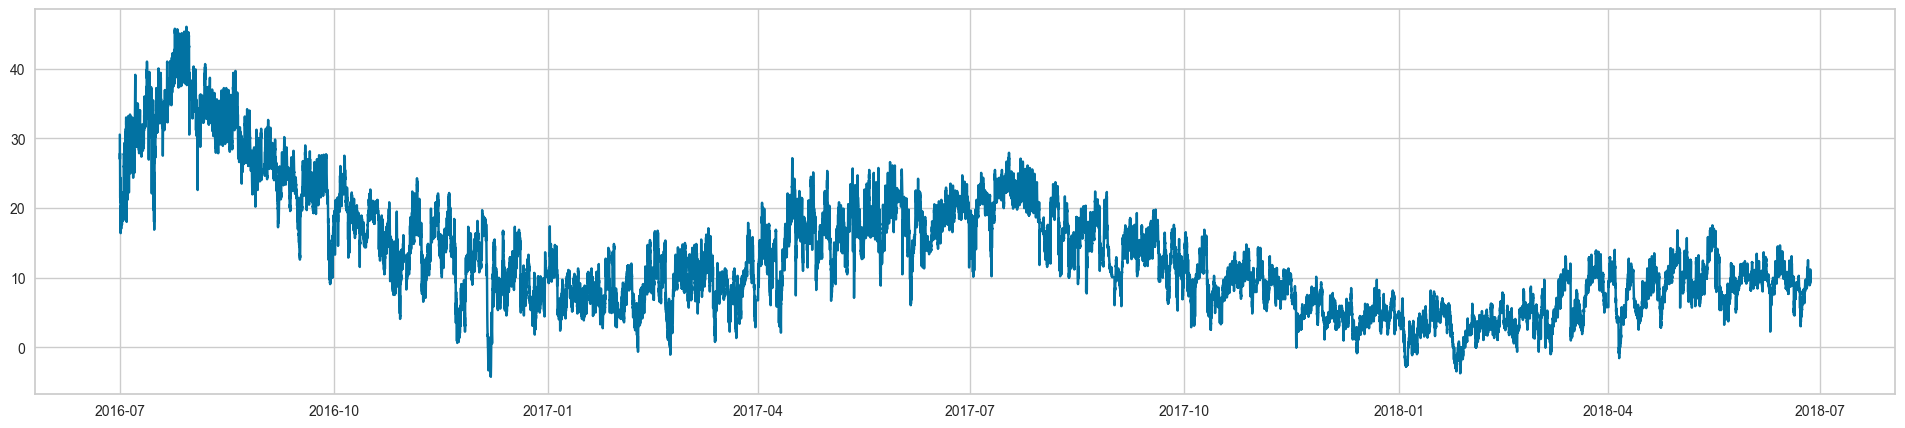

In [36]:
draw_resampled(ett[ett['id'] == 6], '15min', 1)

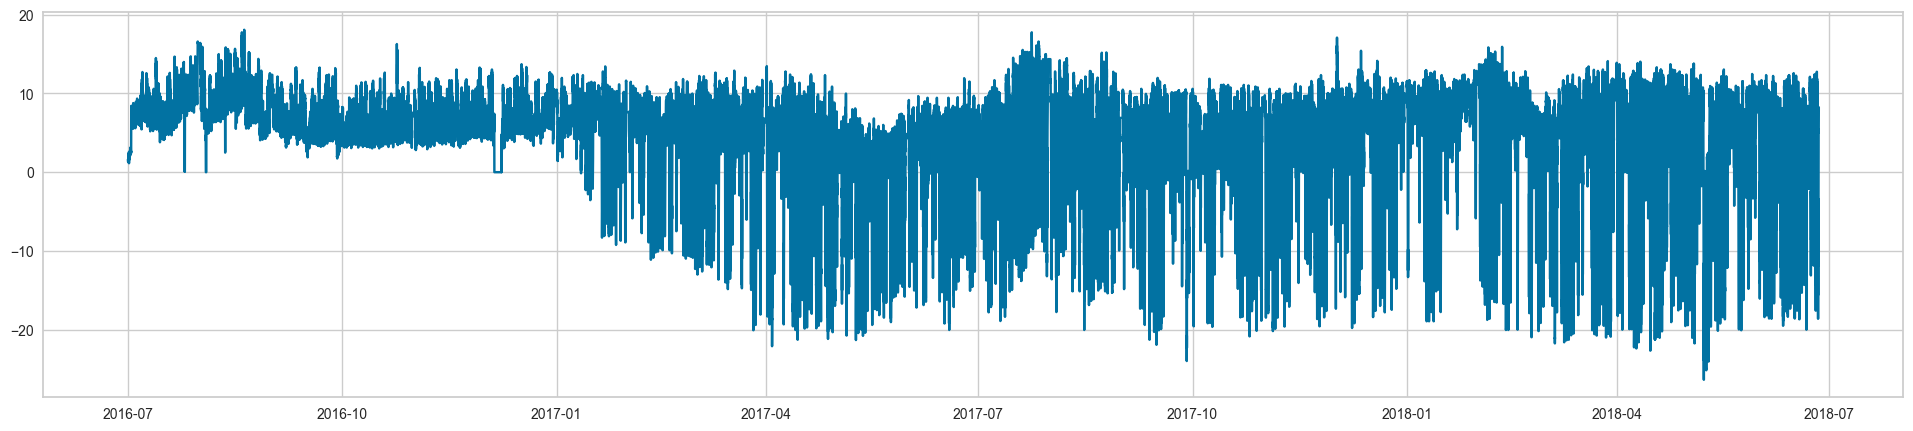

In [37]:
draw_resampled(ett[ett['id'] == 4], '15min', 1)

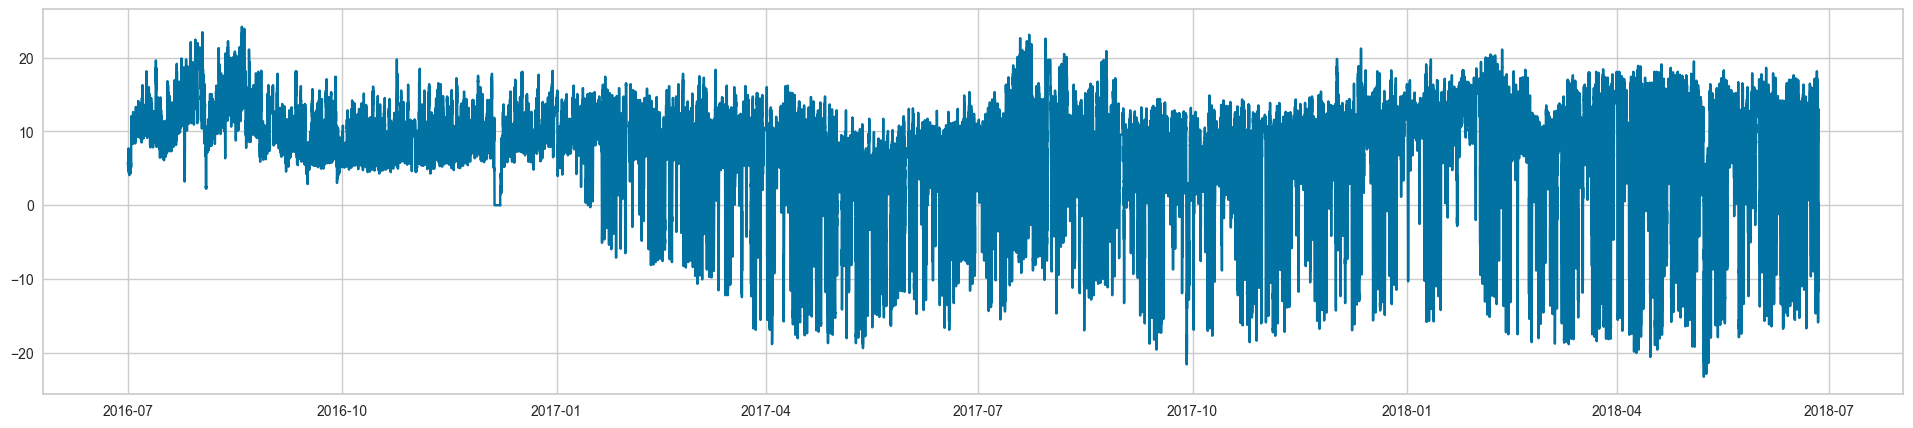

In [38]:
draw_resampled(ett[ett['id'] == 0], '15min', 1)

__Выводы__:
- Датасет довольно интересный и разнородный.
- В одном ряде есть тренд.
- Сезонность не наблюдается.
- Так как ряд 15-минутный, то на нем интересно порешать задачу на временную иерархию.